![](./dis-IRB-140.jpg)

In [32]:
def dh(params):
    from numpy import sin, cos, matrix
    a, d, α, θ = params
    A = matrix([[cos(θ), -sin(θ)*cos(α), sin(θ)*sin(α), a*cos(θ)],
                [sin(θ), cos(θ)*cos(α), -cos(θ)*sin(α), a*sin(θ)],
                [0, sin(α), cos(α), d],
                [0, 0, 0, 1]])
    return A

def posicion(H):
    o = H[0:3, 3:4]
    return o.T

def ejes(H):
    ex = H[0:3, 0:1]
    ey = H[0:3, 1:2]
    ez = H[0:3, 2:3]
    return ex, ey, ez

def graficar_ejes(A, axis):
    # Reutilizamos las funciones creadas anteriormente
    o = posicion(A)
    ex, ey, ez = ejes(A)
    # Utilizamos el axis de la gráfica dada por el usuario, en donde
    # dibujaremos el eje x
    axis.quiver(o.tolist()[0][0], o.tolist()[0][1], o.tolist()[0][2],
                ex.tolist()[0], ex.tolist()[1], ex.tolist()[2],
                color="r", length=30)
    axis.quiver(o.tolist()[0][0], o.tolist()[0][1], o.tolist()[0][2],
                ey.tolist()[0], ey.tolist()[1], ey.tolist()[2],
                color="g", length=30)
    axis.quiver(o.tolist()[0][0], o.tolist()[0][1], o.tolist()[0][2],
                ez.tolist()[0], ez.tolist()[1], ez.tolist()[2],
                color="b", length=30)

In [33]:
l1 = 70
l2 = 352
l3 = 712 - 352
l4 = 380
l5 = 65

In [34]:
def grafica_IRB140(q1, q2, q3, q4, q5, q6):
    from numpy import eye, pi
    from matplotlib.pyplot import figure
    from mpl_toolkits.mplot3d import Axes3D
    #q1, q2, q3, q4, q5, q6 = q
    
    l1 = 70
    l2 = 352
    l3 = 712 - 352
    l4 = 380
    l5 = 65
    
    params = [[l1, l2, pi/2, q1],
              [l3, 0, 0, -q2+pi/2],
              [0, 0, pi/2, -q3],
              [0, l4, -pi/2, q4],
              [0, 0, pi/2, -q5],
              [0, l5, 0, q6]]
    
    As = [dh(param) for param in params]
    Hs = [eye(4)]
    for A in As:
        Hs.append(Hs[-1]*A)
    
    Rs = [H[0:3, 0:3] for H in Hs]
    xs = [H[0,3] for H in Hs]
    ys = [H[1,3] for H in Hs]
    zs = [H[2,3] for H in Hs]
    
    fig = figure(figsize=(12,12))
    ax = fig.gca(projection='3d')
    ax.view_init(elev=30., azim=-45.)
    ax.plot(xs, ys, zs, "--", color=(0,0,0,0.5))
    [graficar_ejes(H, ax) for H in Hs]
    ax.set_xlim(-400, 400)
    ax.set_ylim(-400, 400)
    ax.set_zlim(0, 800)
    print(xs[-1], ys[-1], zs[-1])
    
    return ax

515.0 -5.204748896376249e-15 712.0


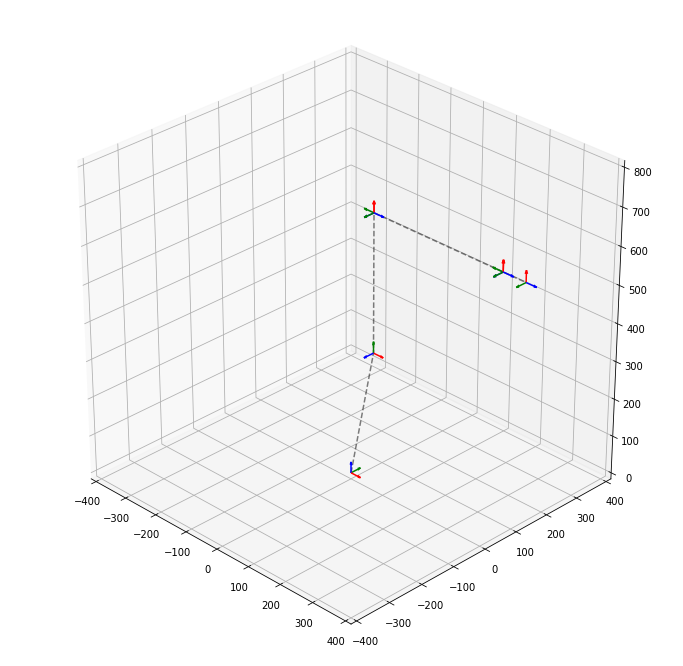

In [35]:
grafica_IRB140(0,0,0,0,0,0);

In [36]:
from ipywidgets import interact, fixed
from numpy import pi, radians

In [37]:
interact(grafica_IRB140, q1=(-pi, pi), q2=(-pi, pi), q3=(-pi, pi), q4=(-pi, pi), q5=(-pi, pi), q6=(-pi, pi))

interactive(children=(FloatSlider(value=0.0, description='q1', max=3.141592653589793, min=-3.141592653589793),…

<function __main__.grafica_IRB140(q1, q2, q3, q4, q5, q6)>

In [38]:
from numpy import matrix, pi

In [39]:
def rot_z(θ):
    from numpy import sin, cos, matrix
    
    A = matrix([[cos(θ), -sin(θ), 0, 0],
                [sin(θ), cos(θ), 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def rot_y(θ):
    from numpy import sin, cos, matrix
    
    A = matrix([[cos(θ), 0, sin(θ), 0],
                [0, 1, 0, 0],
                [-sin(θ), 0, cos(θ), 0],
                [0, 0, 0, 1]])
    return A

def tras_z(z):
    from numpy import sin, cos, matrix
    
    A = matrix([[1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, 1, z],
                [0, 0, 0, 1]])
    return A

def tras_y(y):
    from numpy import sin, cos, matrix
    
    A = matrix([[1, 0, 0, 0],
                [0, 1, 0, y],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def tras_x(x):
    from numpy import sin, cos, matrix
    
    A = matrix([[1, 0, 0, x],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

In [49]:
puntos = [[0, 0], [100, 0], [100, 100], [0, 100], [0, 0]]
vectores = [matrix(punto + [0, 1]).T for punto in puntos]
trans = tras_x(550)*tras_z(712)*rot_y(-pi/2)
vec_trans = [trans*vector for vector in vectores]

In [50]:
xs, ys, zs = matrix([vector[:3].T.tolist()[0] for vector in vec_trans]).T

In [51]:
xs = xs.tolist()[0]
ys = ys.tolist()[0]
zs = zs.tolist()[0]

In [52]:
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D

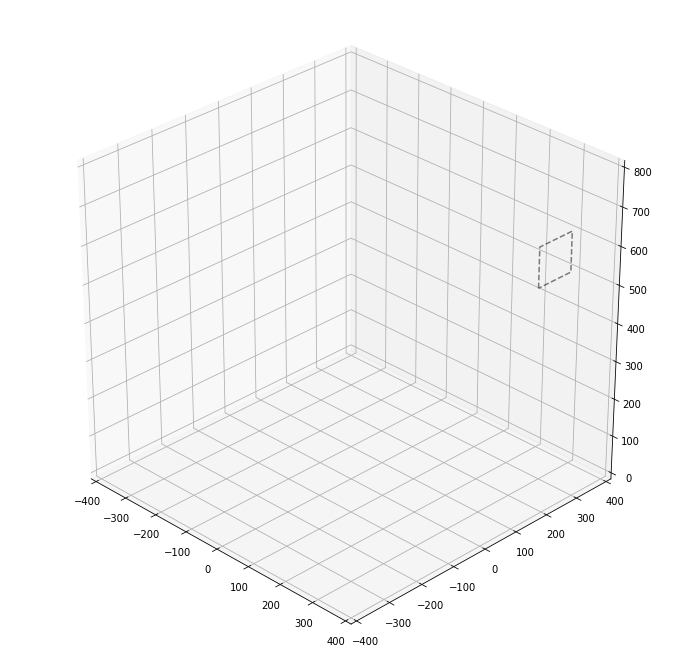

In [53]:
fig = figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.view_init(elev=30., azim=-45.)

ax.plot(xs, ys, zs, "--", color=(0,0,0,0.5))

ax.set_xlim(-400, 400)
ax.set_ylim(-400, 400)
ax.set_zlim(0, 800);

In [54]:
def grafica_IRB140_puntos(q1, q2, q3, q4, q5, q6, puntos):
    ax = grafica_IRB140(q1, q2, q3, q4, q5, q6)
    
    vectores = [matrix(punto + [0, 1]).T for punto in puntos]
    trans = tras_x(550)*tras_z(712)*rot_y(-pi/2)
    vec_trans = [trans*vector for vector in vectores]
    
    xs, ys, zs = matrix([vector[:3].T.tolist()[0] for vector in vec_trans]).T
    xs = xs.tolist()[0]
    ys = ys.tolist()[0]
    zs = zs.tolist()[0]
    
    ax.plot(xs, ys, zs, "--", color=(0,0,0,0.8))

In [55]:
interact(grafica_IRB140_puntos, q1=(-pi, pi), q2=(-pi, pi), q3=(-pi, pi),
         q4=(-pi, pi), q5=(-pi, pi), q6=(-pi, pi), puntos=fixed(puntos))

interactive(children=(FloatSlider(value=0.0, description='q1', max=3.141592653589793, min=-3.141592653589793),…

<function __main__.grafica_IRB140_puntos(q1, q2, q3, q4, q5, q6, puntos)>

In [56]:
puntos

[[0, 0], [100, 0], [100, 100], [0, 100], [0, 0]]

In [57]:
vec_trans

[matrix([[550.],
         [  0.],
         [712.],
         [  1.]]), matrix([[550.],
         [  0.],
         [812.],
         [  1.]]), matrix([[550.],
         [100.],
         [812.],
         [  1.]]), matrix([[550.],
         [100.],
         [712.],
         [  1.]]), matrix([[550.],
         [  0.],
         [712.],
         [  1.]])]

```RAPID
#PERS  tooldata tPen := [ TRUE, [[200, 0, 30], [1, 0, 0 ,0]], [0.8, [62, 0, 17], [1, 0, 0, 0], 0, 0, 0]];
PERS tooldata tool0 := [ TRUE, [[0, 0, 0], [1, 0, 0, 0]], [0.001, [0, 0, 0.001], [1, 0, 0, 0], 0, 0, 0]];
    
CONST robtarget p10 := [ [600, -100, 800], [0.707170, 0, 0.707170, 0], [0, 0, 0, 0], [ 9E9, 9E9, 9E9, 9E9, 9E9, 9E9] ];
CONST robtarget p20 := [ [600,  100, 800], [0.707170, 0, 0.707170, 0], [0, 0, 0, 0], [ 9E9, 9E9, 9E9, 9E9, 9E9, 9E9] ];
CONST robtarget p30 := [ [800,  100, 800], [0.707170, 0, 0.707170, 0], [0, 0, 0, 0], [ 9E9, 9E9, 9E9, 9E9, 9E9, 9E9] ];
CONST robtarget p40 := [ [800, -100, 800], [0.707170, 0, 0.707170, 0], [0, 0, 0, 0], [ 9E9, 9E9, 9E9, 9E9, 9E9, 9E9] ];
    
PROC main()
  MoveL p10, v200, z20, tPen;
  MoveL p20, v200, z20, tPen;
  MoveL p30, v200, z20, tPen;
  MoveL p40, v200, z20, tPen;
  MoveL p10, v200, z20, tPen;
ENDPROC
```

In [65]:
inicio_modulo = "MODULE MainModule"
#preambulo = "PERS tooldata tool0 := [ TRUE, [[0, 0, 0], [1, 0, 0, 0]], [0.001, [0, 0, 0.001], [1, 0, 0, 0], 0, 0, 0]];"

pre_main = "\tPROC main()\n\t\tCornerPathWarning FALSE;"
pos_main = "\tENDPROC"

pre_punto = "\tCONST robtarget "
mid_punto = " := [ "
pos_punto = ", [0.707106781, 0, 0.707106781, 0], [0, 0, 0, 0], [ 9E9, 9E9, 9E9, 9E9, 9E9, 9E9] ];"

pre_movel = "\t\tMoveJ "
pos_movel =  ", v200, z20, tool0;"
fin_modulo = "ENDMODULE"

In [66]:
programa = []
programa.append(inicio_modulo)
#programa.append(preambulo)

for i, vector in enumerate(vec_trans):
    programa.append(pre_punto + "p" + "{:02d}".format(i+1) + mid_punto + str(vector.T.tolist()[0][:3]) + pos_punto)

programa.append(pre_main)

for i, vector in enumerate(vec_trans):
    programa.append(pre_movel + "p" + "{:02d}".format(i+1) + pos_movel)
    
programa.append(pos_main)
programa.append(fin_modulo)

In [67]:
prog_completo = "\n".join(programa)

In [68]:
prog_arranque = """<?xml version="1.0" encoding="ISO-8859-1" ?>
<Program>
	<Module>MainModule.mod</Module>
</Program>"""

In [69]:
with open("./ABB/cuadrado/cuadrado.pgf", "w") as text_file:
    text_file.write(prog_arranque)

In [70]:
with open("./ABB/cuadrado/MainModule.mod", "w") as text_file:
    text_file.write(prog_completo)

In [71]:
print(prog_completo)

MODULE MainModule
	CONST robtarget p01 := [ [550.0, 0.0, 712.0], [0.707106781, 0, 0.707106781, 0], [0, 0, 0, 0], [ 9E9, 9E9, 9E9, 9E9, 9E9, 9E9] ];
	CONST robtarget p02 := [ [550.0, 0.0, 812.0], [0.707106781, 0, 0.707106781, 0], [0, 0, 0, 0], [ 9E9, 9E9, 9E9, 9E9, 9E9, 9E9] ];
	CONST robtarget p03 := [ [550.0, 100.0, 812.0], [0.707106781, 0, 0.707106781, 0], [0, 0, 0, 0], [ 9E9, 9E9, 9E9, 9E9, 9E9, 9E9] ];
	CONST robtarget p04 := [ [550.0, 100.0, 712.0], [0.707106781, 0, 0.707106781, 0], [0, 0, 0, 0], [ 9E9, 9E9, 9E9, 9E9, 9E9, 9E9] ];
	CONST robtarget p05 := [ [550.0, 0.0, 712.0], [0.707106781, 0, 0.707106781, 0], [0, 0, 0, 0], [ 9E9, 9E9, 9E9, 9E9, 9E9, 9E9] ];
	PROC main()
		CornerPathWarning FALSE;
		MoveJ p01, v200, z20, tool0;
		MoveJ p02, v200, z20, tool0;
		MoveJ p03, v200, z20, tool0;
		MoveJ p04, v200, z20, tool0;
		MoveJ p05, v200, z20, tool0;
	ENDPROC
ENDMODULE


10 apagadores

Ivonne Jimenez
55 3721 9992